# Data Cleaning Steps
* 1- Handling Nulls
* 2- Remove Duplicated Data
* 3- Processing Skewed Data
* 4- Normalization (Using MinMaxScaler)
* 5- Get Correlation Between Numerical Data

In [74]:
import pandas as pd
import numpy as np 

import seaborn as sb 
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler    #mean norm (x-mean)/std   2/3 of data in range -1 to 1 and mean =0
from sklearn.preprocessing import MinMaxScaler      #range from 0 to 1

# First: Collecting the Data

In [75]:
housing = pd.read_csv("D:\Engineering\IBM_Data_Scientist\Lectures\Lec26\lec19 extra friday\Ames_Housing_Data1.tsv", sep='\t')
housing.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000


# 1- Handling Nulls

In [76]:
null_columns = housing.isnull().sum().sort_values(ascending=False)
null_columns[null_columns != 0]        # 27 columns

Pool QC           2918
Misc Feature      2825
Alley             2733
Fence             2359
Fireplace Qu      1422
Lot Frontage       490
Garage Qual        159
Garage Yr Blt      159
Garage Cond        159
Garage Finish      159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
BsmtFin Type 1      80
Bsmt Cond           80
Bsmt Qual           80
Mas Vnr Type        23
Mas Vnr Area        23
Bsmt Full Bath       2
Bsmt Half Bath       2
Garage Area          1
Garage Cars          1
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 2         1
BsmtFin SF 1         1
Electrical           1
dtype: int64

In [77]:
# Drop first five columns in null_columns because they are useless as they have a huge number of null values
housing = housing.drop(null_columns.index[0:5], axis=1)
housing.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,1,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,5,2010,WD,Normal,215000
2,2,526350040,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,...,0,0,120,0,0,6,2010,WD,Normal,105000
3,3,526351010,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,...,0,0,0,0,12500,6,2010,WD,Normal,172000
4,4,526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2010,WD,Normal,244000


In [78]:
null_columns = housing.isnull().sum().sort_values(ascending=False)
null_columns = null_columns[null_columns != 0]        # 22 columns
null_columns

Lot Frontage      490
Garage Yr Blt     159
Garage Finish     159
Garage Qual       159
Garage Cond       159
Garage Type       157
Bsmt Exposure      83
BsmtFin Type 2     81
Bsmt Qual          80
BsmtFin Type 1     80
Bsmt Cond          80
Mas Vnr Area       23
Mas Vnr Type       23
Bsmt Full Bath      2
Bsmt Half Bath      2
BsmtFin SF 2        1
Electrical          1
BsmtFin SF 1        1
Bsmt Unf SF         1
Total Bsmt SF       1
Garage Cars         1
Garage Area         1
dtype: int64

In [79]:
# housing.shape
for i in null_columns.index:
    print(housing[i].dtype == object)

False
False
True
True
True
True
True
True
True
True
True
False
True
False
False
False
True
False
False
False
False
False


In [80]:
# Replace nan numerical values with mean of its columns and drop string nan values
for i in null_columns.index:
    if(housing[i].dtype != object):
        mean = housing[i].mean()
        housing[i].fillna(mean, inplace= True)
    else:
        housing.dropna(subset=[i], inplace=True)

In [81]:
# Check if there any other nan values
housing.isnull().sum().sum()

0

# 2- Remobve Duplicated Data

In [82]:
housing.duplicated().sum()

1

In [83]:
housing = housing.drop_duplicates()
housing.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,5,2010,WD,Normal,215000
2,2,526350040,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,...,0,0,120,0,0,6,2010,WD,Normal,105000
3,3,526351010,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,...,0,0,0,0,12500,6,2010,WD,Normal,172000
4,4,526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2010,WD,Normal,244000
5,5,527105010,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,3,2010,WD,Normal,189900


# 3- Processing Skewed Data

# Fisrt: Get numerical data only

In [84]:
# Get the numerical data only from housing DataFrame
housing_numerical = housing.select_dtypes(include= ['float64', 'int64']).copy()
housing_numerical.head()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,1,526301100,20,141.0,31770,6,5,1960,1960,112.0,...,210,62,0,0,0,0,0,5,2010,215000
2,2,526350040,20,80.0,11622,5,6,1961,1961,0.0,...,140,0,0,0,120,0,0,6,2010,105000
3,3,526351010,20,81.0,14267,6,6,1958,1958,108.0,...,393,36,0,0,0,0,12500,6,2010,172000
4,4,526353030,20,93.0,11160,7,5,1968,1968,0.0,...,0,0,0,0,0,0,0,4,2010,244000
5,5,527105010,60,74.0,13830,5,5,1997,1998,0.0,...,212,34,0,0,0,0,0,3,2010,189900


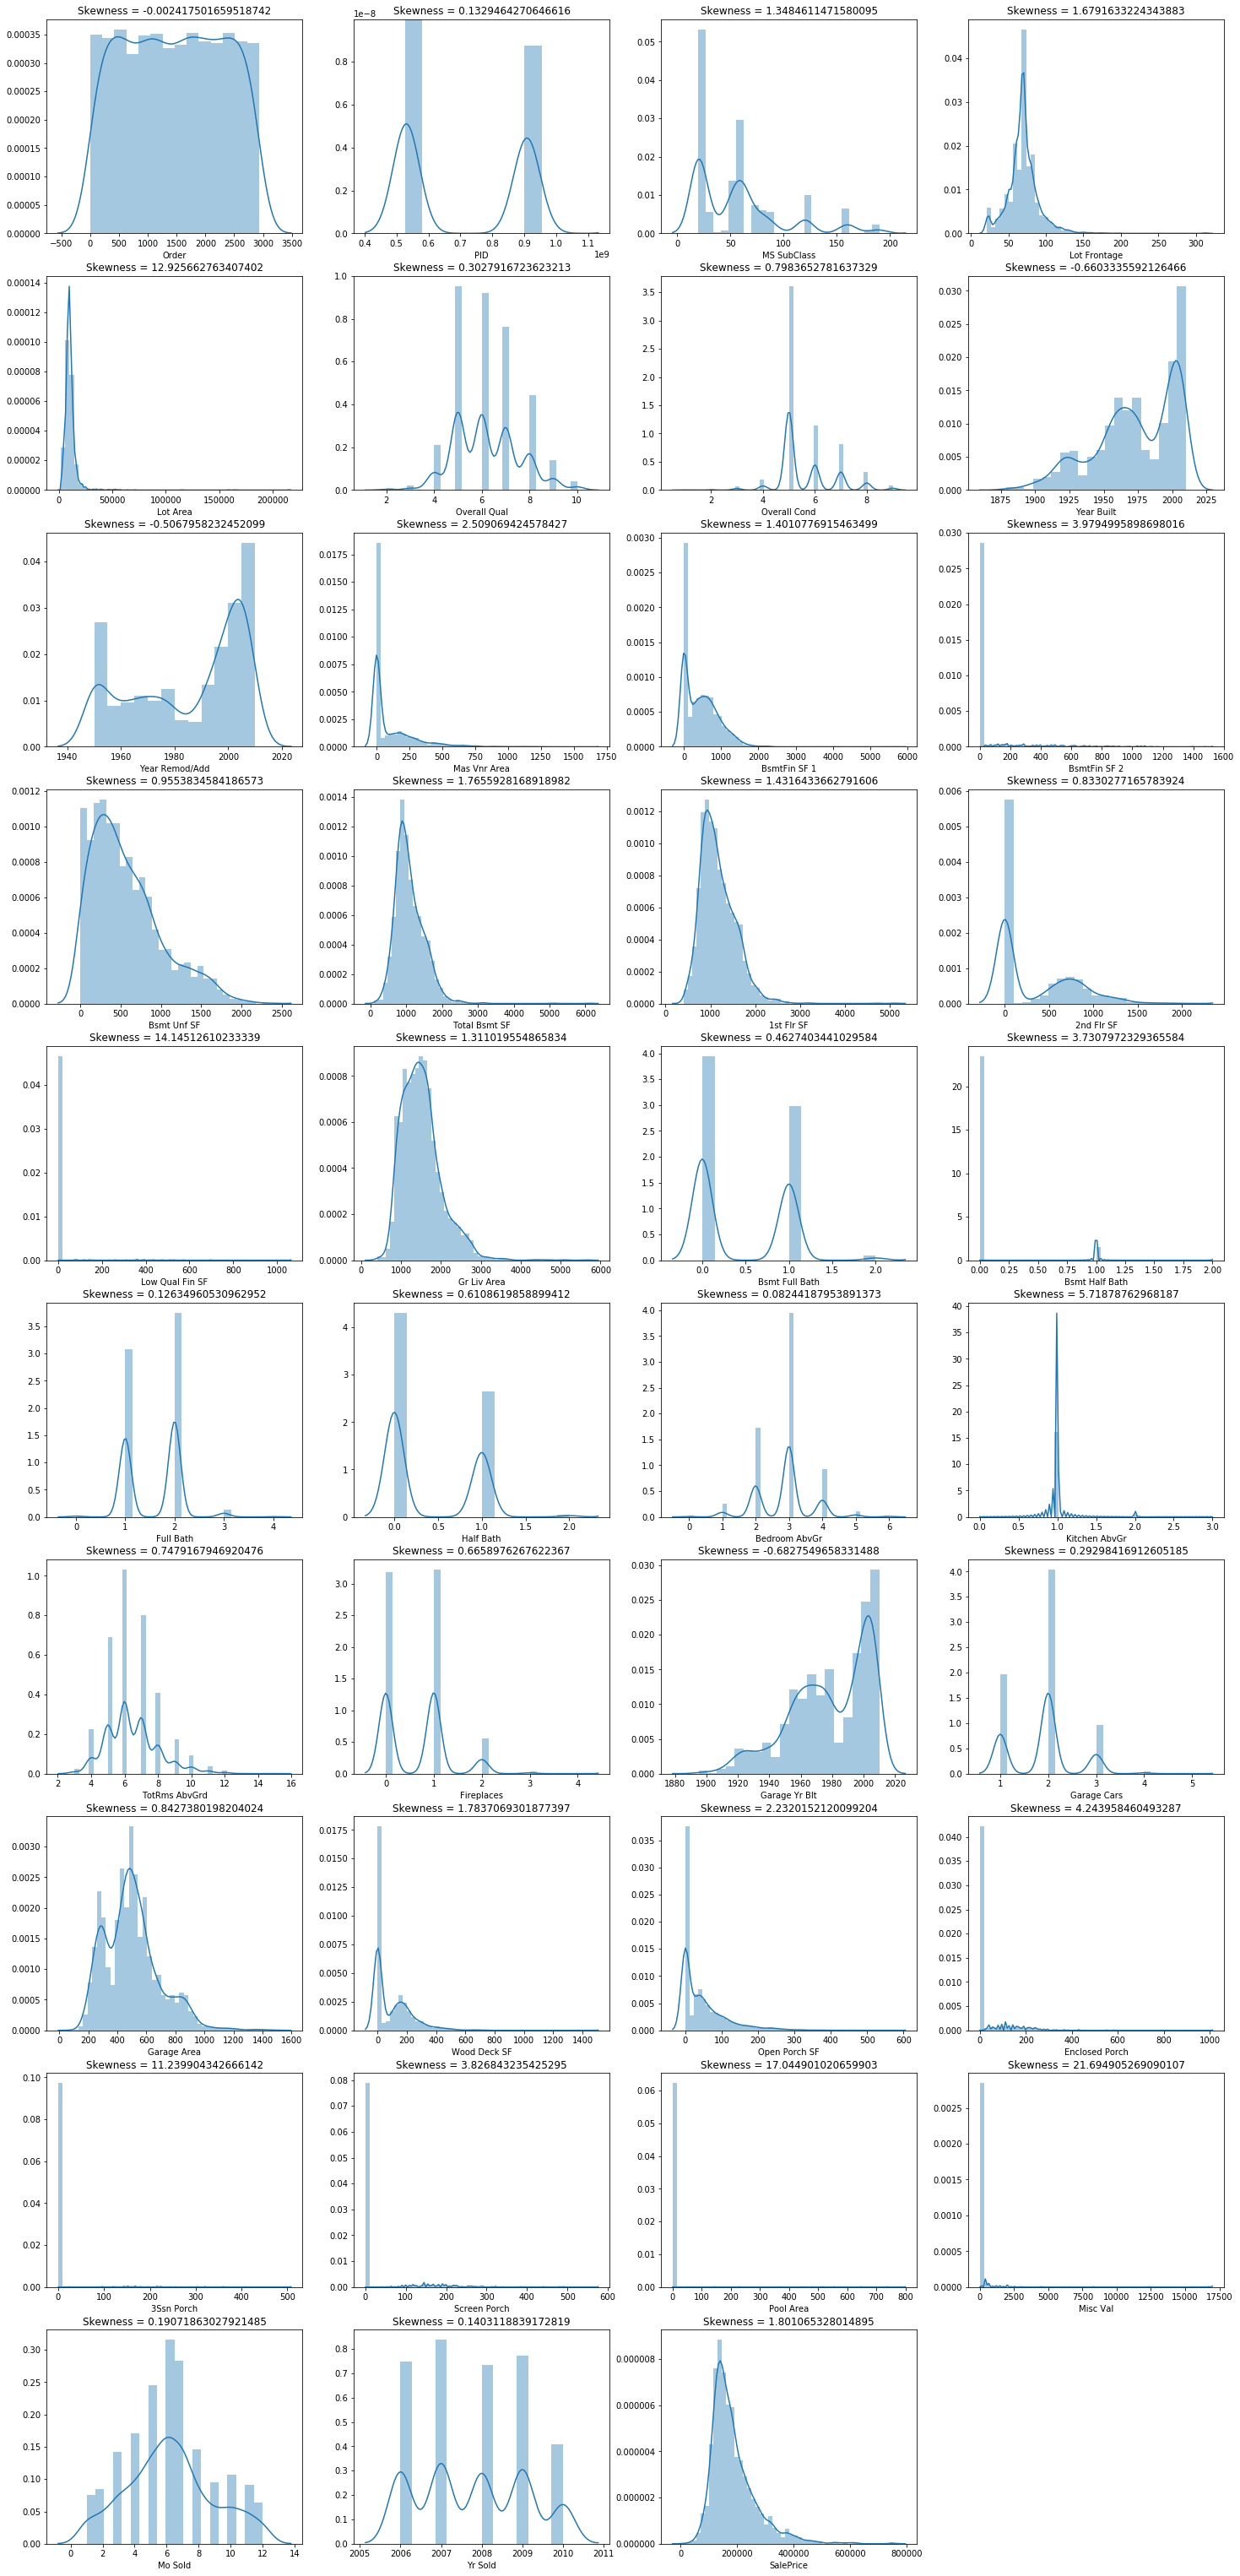

In [85]:
plt.figure(figsize=[25,55])
for i in range(0, housing_numerical.shape[1]):
    plt.subplot(10, 4, i+1)
    column = housing[housing_numerical.columns[i]]
    sb.distplot(column)
    plt.title(f"Skewness = {column.skew()}")

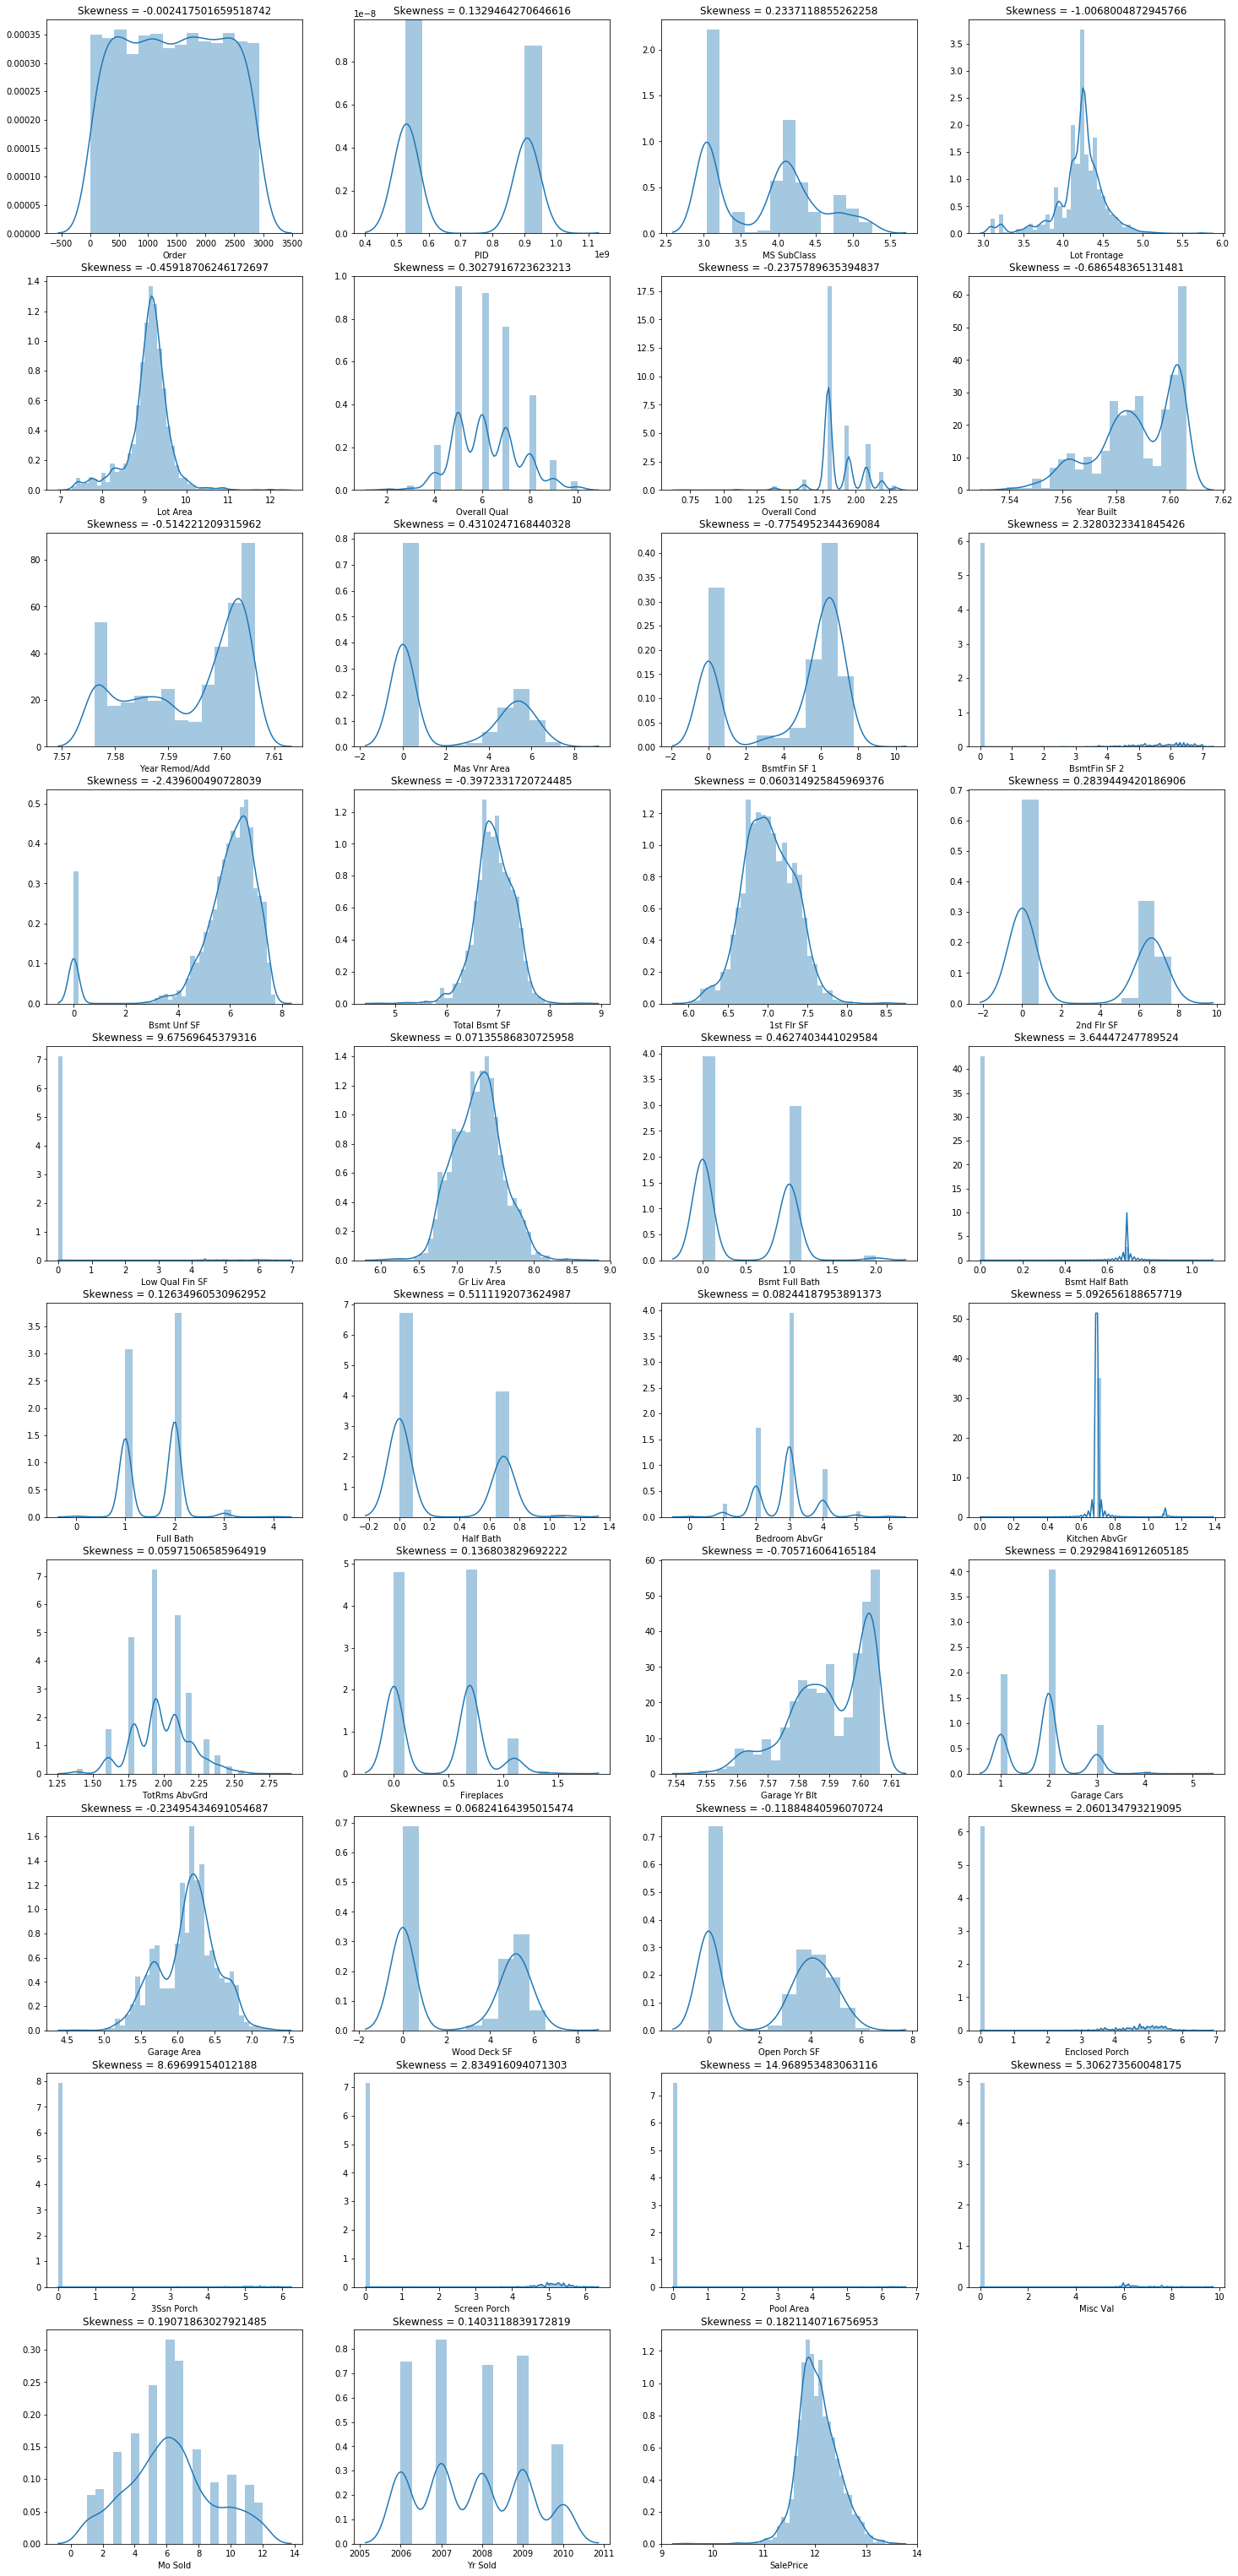

In [86]:
# Use log tranform to reduce the skewness of the data
plt.figure(figsize=[25,55])
for i in range(0, housing_numerical.shape[1]):
    plt.subplot(10, 4, i+1)
    column = housing[housing_numerical.columns[i]].copy()
    if(abs(column.skew()) > 0.5):
        column = np.log1p(housing[housing_numerical.columns[i]])      # Use log(x+1) to take log(x=0) without errors
        housing.loc[ : , housing_numerical.columns[i]] = column                # Update the DataFrame
        
    sb.distplot(column)
    plt.title(f"Skewness = {column.skew()}")


# 4- Normalization (Using MinMaxScaler for numerical data only)

In [87]:
# Normalize the numerical data only in the DataFrame
housing_normalized = housing.copy()
housing_normalized[housing_numerical.columns] = MinMaxScaler().fit_transform(housing_normalized[housing_numerical.columns])
housing_normalized.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,0.000000,0.000000,0.000000,RL,0.701482,0.625492,Pave,IR1,Lvl,AllPub,...,0.0,0.0,0.000000,0.0,0.000000,0.363636,1.0,WD,Normal,0.691991
2,0.000341,0.000102,0.000000,RH,0.490307,0.428656,Pave,Reg,Lvl,AllPub,...,0.0,0.0,0.754311,0.0,0.000000,0.454545,1.0,WD,Normal,0.516252
3,0.000683,0.000104,0.000000,RL,0.494922,0.468791,Pave,IR1,Lvl,AllPub,...,0.0,0.0,0.000000,0.0,0.968436,0.454545,1.0,WD,Normal,0.637274
4,0.001024,0.000108,0.000000,RL,0.546298,0.420716,Pave,Reg,Lvl,AllPub,...,0.0,0.0,0.000000,0.0,0.000000,0.272727,1.0,WD,Normal,0.723018
5,0.001366,0.001672,0.483003,RL,0.461356,0.462701,Pave,IR1,Lvl,AllPub,...,0.0,0.0,0.000000,0.0,0.000000,0.181818,1.0,WD,Normal,0.661550


# 5- Get Correlation Between Numerical Data

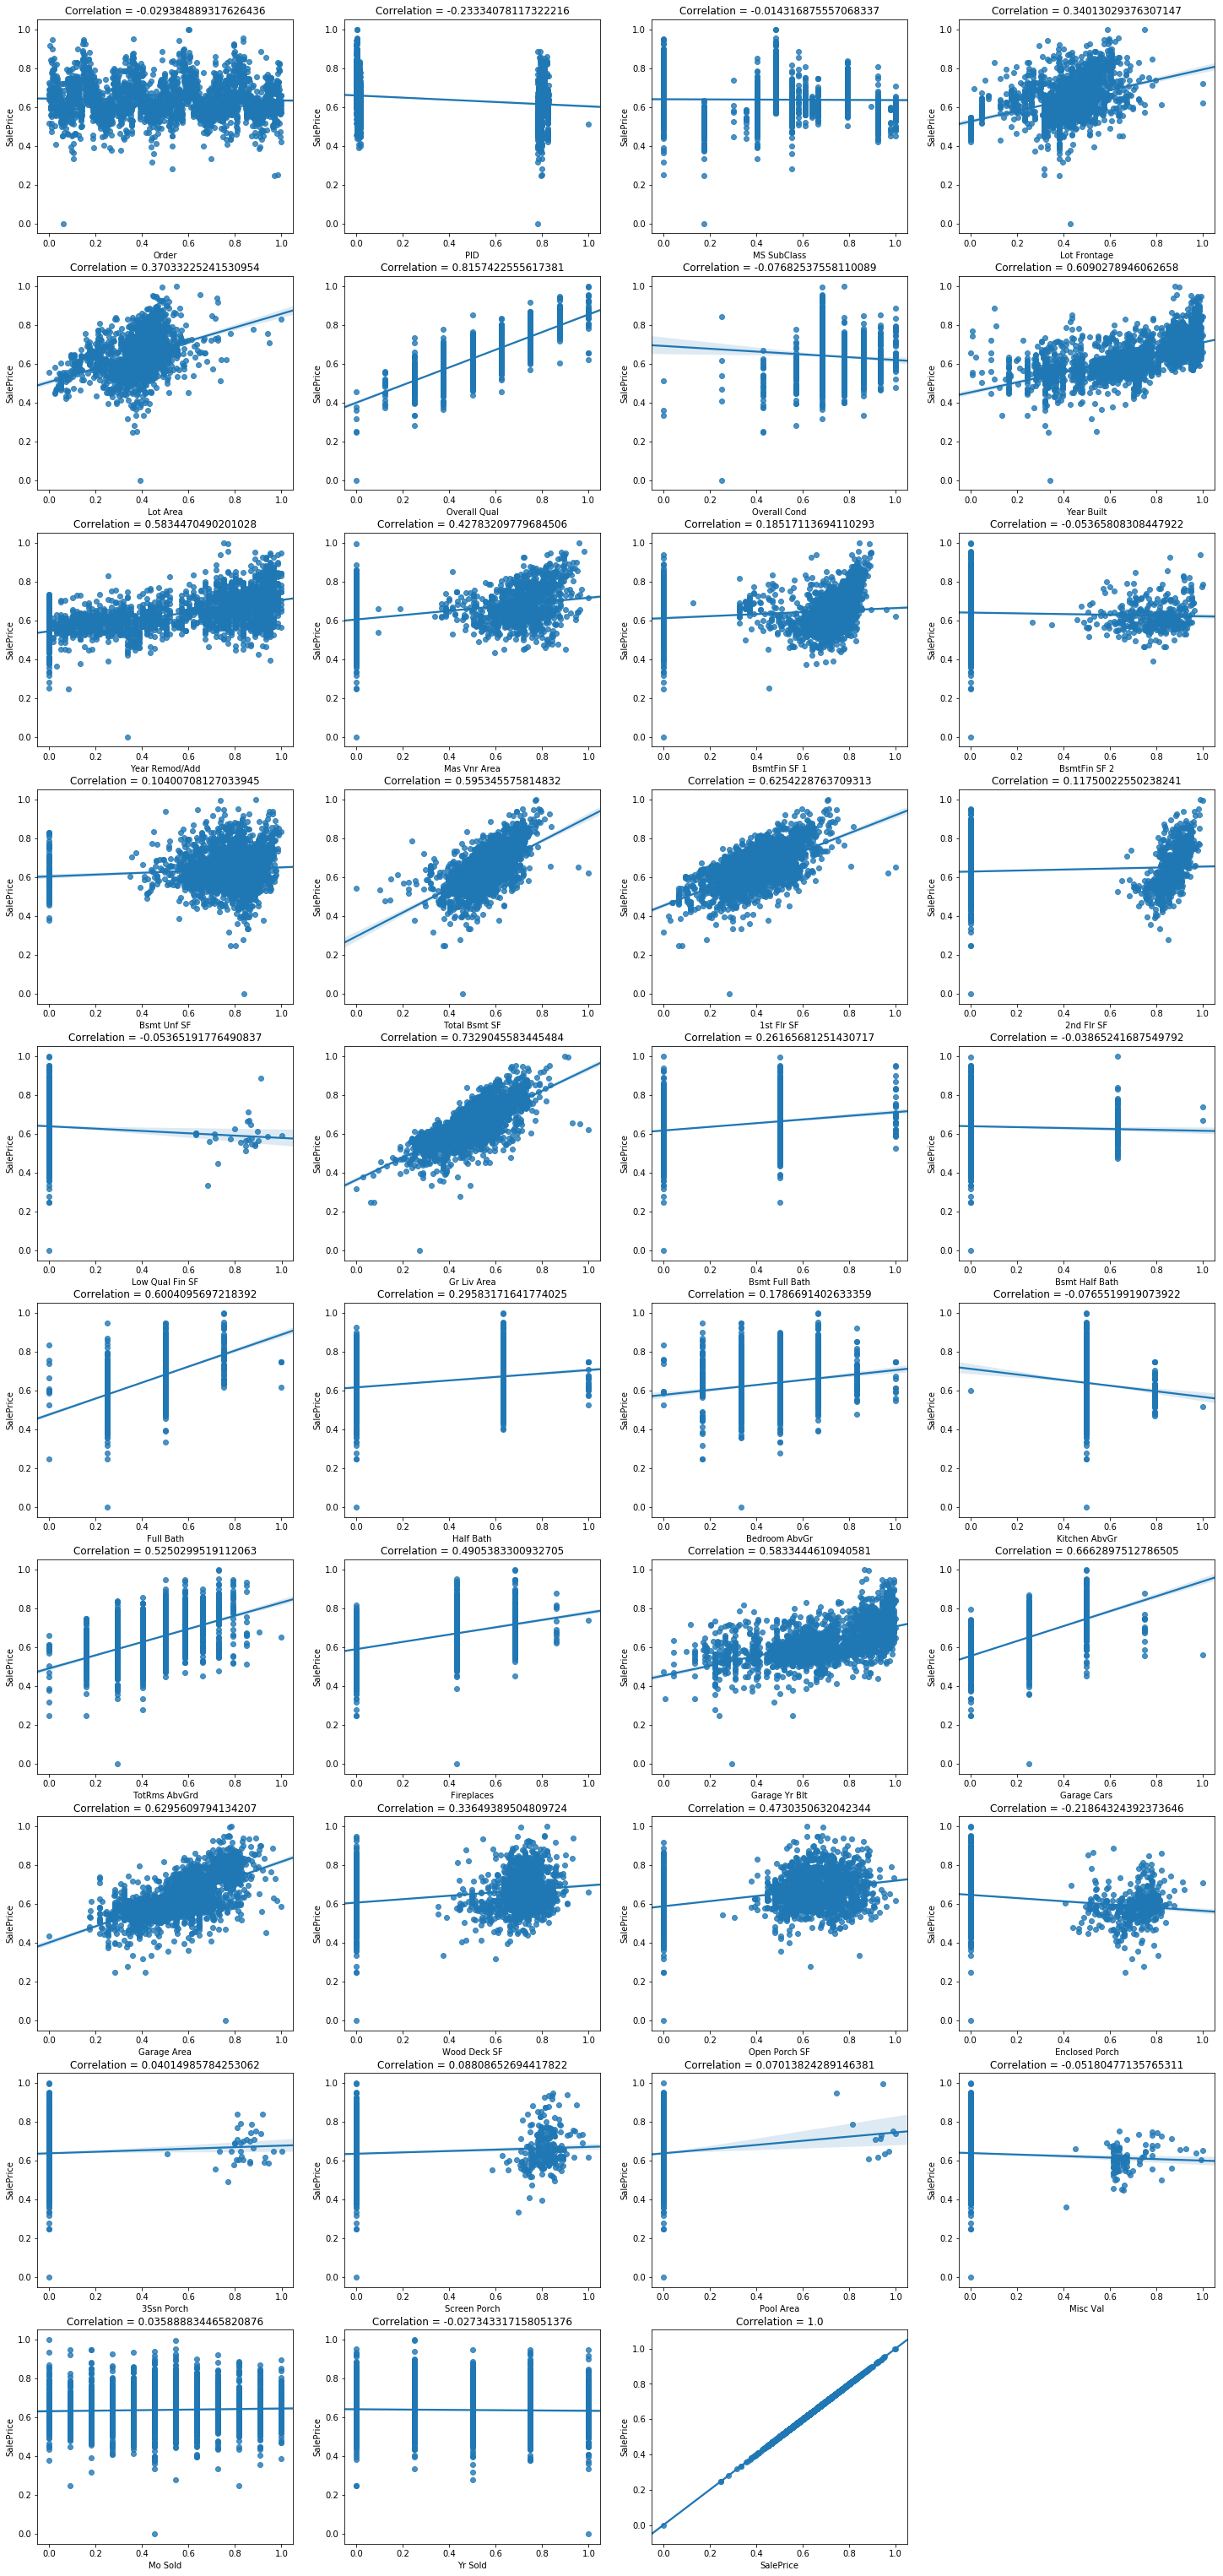

In [93]:
# Show correlation and outliers first by data visualization
plt.figure(figsize = [25, 55])
# Calculate the correlation for each numerical column with "SalePrice" column
corr = housing_normalized[housing_numerical.columns].corr()['SalePrice']
for i in range(len(housing_numerical.columns)): #range 0 to 38
    plt.subplot(10, 4, 1+i)
    sb.regplot(data = housing_normalized[housing_numerical.columns], x = housing_numerical.columns[i], y = 'SalePrice');
    plt.xlabel(housing_numerical.columns[i]);
    plt.ylabel('SalePrice');
    plt.title(f"Correlation = {corr[i]}")

In [95]:
# Get the numerical data only from housing DataFrame
housing_numerical = housing_normalized.select_dtypes(include= ['float64', 'int64']).copy()      # temp variable to store numerical data of "housing_normalized" DF
housing_numerical.head()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,0.000000,0.000000,0.000000,0.701482,0.625492,0.500,0.682606,0.626226,0.168784,0.640708,...,0.736975,0.652731,0.0,0.0,0.000000,0.0,0.000000,0.363636,1.0,0.691991
2,0.000341,0.000102,0.000000,0.490307,0.428656,0.375,0.778385,0.633794,0.185615,0.000000,...,0.681466,0.000000,0.0,0.0,0.754311,0.0,0.000000,0.454545,1.0,0.516252
3,0.000683,0.000104,0.000000,0.494922,0.468791,0.500,0.778385,0.611077,0.135096,0.635823,...,0.822970,0.568882,0.0,0.0,0.000000,0.0,0.968436,0.454545,1.0,0.637274
4,0.001024,0.000108,0.000000,0.546298,0.420716,0.625,0.682606,0.686666,0.303193,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.272727,1.0,0.723018
5,0.001366,0.001672,0.483003,0.461356,0.462701,0.375,0.682606,0.903720,0.802409,0.000000,...,0.738274,0.560128,0.0,0.0,0.000000,0.0,0.000000,0.181818,1.0,0.661550


In [100]:
# Calculate corelation between every column and 'SalePrice' column
housing_numerical_corr = housing_numerical.corr()['SalePrice'].sort_values(ascending= False)
housing_numerical_corr

SalePrice          1.000000
Overall Qual       0.815742
Gr Liv Area        0.732905
Garage Cars        0.666290
Garage Area        0.629561
1st Flr SF         0.625423
Year Built         0.609028
Full Bath          0.600410
Total Bsmt SF      0.595346
Year Remod/Add     0.583447
Garage Yr Blt      0.583344
TotRms AbvGrd      0.525030
Fireplaces         0.490538
Open Porch SF      0.473035
Mas Vnr Area       0.427832
Lot Area           0.370332
Lot Frontage       0.340130
Wood Deck SF       0.336494
Half Bath          0.295832
Bsmt Full Bath     0.261657
BsmtFin SF 1       0.185171
Bedroom AbvGr      0.178669
2nd Flr SF         0.117500
Bsmt Unf SF        0.104007
Screen Porch       0.088087
Pool Area          0.070138
3Ssn Porch         0.040150
Mo Sold            0.035889
MS SubClass       -0.014317
Yr Sold           -0.027343
Order             -0.029385
Bsmt Half Bath    -0.038652
Misc Val          -0.051805
Low Qual Fin SF   -0.053652
BsmtFin SF 2      -0.053658
Kitchen AbvGr     -0

In [101]:
# Get columns with high correlation
high_corr_features = housing_numerical_corr[abs(housing_numerical_corr) > 0.5].sort_values(ascending=False)
high_corr_features

SalePrice         1.000000
Overall Qual      0.815742
Gr Liv Area       0.732905
Garage Cars       0.666290
Garage Area       0.629561
1st Flr SF        0.625423
Year Built        0.609028
Full Bath         0.600410
Total Bsmt SF     0.595346
Year Remod/Add    0.583447
Garage Yr Blt     0.583344
TotRms AbvGrd     0.525030
Name: SalePrice, dtype: float64